# How to tell a story using data

I’ve decided to open a small robot-run cafe in Los Ageles. The project is promising but expensive, so my partners and I decided to try to attract investors. They’re interested in the current market conditions — will we be able to maintain our success when the novelty of robot waiters wears off?

I'm an analytics guru, so my partners have asked me to prepare some market research. I have open-source data on restaurants in LA.

## Description of the data

*/datasets/rest_data_us.csv*
- **object_name** — establishment name
- **chain** — chain establishment (True/False)
- **object_type** — establishment type
- **address** — physical address
- **number** — number of seats



### Step 1: Download the data & general overview

#### Import libraries

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

#### General info & descriptive stats

In [2]:
# read .csv file & look at general info

est_data = pd.read_csv('/datasets/rest_data_us.csv')

display(est_data.info())
display(est_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [3]:
# look at descriptive stats

display(est_data.describe())

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


#### Check for duplicates

In [4]:
# checking for duplicates

print("Number of duplicates in 'est_data':", est_data.duplicated().sum())

Number of duplicates in 'est_data': 0


#### Conclusion
There are a few issues we can immediately see from our initial overview. We'll need to address these in the next step.
 - We should change the column names to more descriptive labels
 - There are 3 missing values in the **'chain'** column
 - We should make all *object* dtype values lowercase
 - The **'id'** column dtype should be changed to *object*
 - The **'chain'** column dtype should be changed to *bool*

### Step 2: Data preprocessing

#### Change column names

In [5]:
# change column names

est_data.columns = ['id', 'est_name', 'address', 'is_chain', 'est_type', 'n_seats']
est_data.head()

,id,est_name,address,is_chain,est_type,n_seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


#### Delete missing values

In [6]:
# drop missing values

est_data.dropna(inplace=True)
est_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
id          9648 non-null int64
est_name    9648 non-null object
address     9648 non-null object
is_chain    9648 non-null object
est_type    9648 non-null object
n_seats     9648 non-null int64
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


#### Lowercase values for *object* columns

In [7]:
# make column values lowercase

lower_cols = ['est_name', 'address', 'est_type']

est_data[lower_cols] = est_data[lower_cols].apply(lambda x: x.astype(str).str.lower())
est_data.head()

,id,est_name,address,is_chain,est_type,n_seats
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26
1,11787,reilly's,100 world way # 120,False,restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22
4,11790,pollen,2100 echo park ave,False,restaurant,20


#### Change data types

In [8]:
# change 'id' to object dtype with .astype() method

est_data['id'] = est_data['id'].astype(str)
est_data['is_chain'] = est_data['is_chain'].astype(bool)

est_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
id          9648 non-null object
est_name    9648 non-null object
address     9648 non-null object
is_chain    9648 non-null bool
est_type    9648 non-null object
n_seats     9648 non-null int64
dtypes: bool(1), int64(1), object(4)
memory usage: 461.7+ KB


### Step 2: Data analysis

#### Proportions of different restaurant types

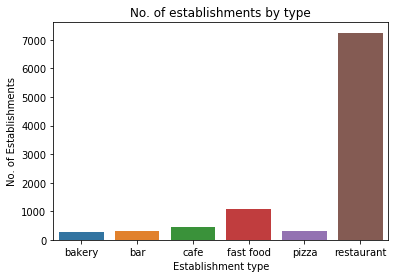

In [9]:
# bar graph of restaurant types

est_type_proportions = est_data.groupby('est_type')['id'].count().reset_index()

ax = sns.barplot(x='est_type', y='id', data=est_type_proportions)
ax.set_title('No. of establishments by type')
ax.set_xlabel('Establishment type')
ax.set_ylabel('No. of Establishments')
plt.show()

##### Conclusion
Restaurants are the most common establishment type by a long shot, with over 7000 establishments. The next most common is fast food. The remaining establishment types have relatively similar proportions in relation to the total number of establishments.

#### Proportions of chain & non-chain restaurants

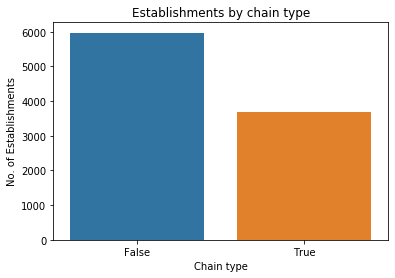

In [10]:
# pie chart of chain type

chain_type_proportions = est_data.groupby('is_chain')['id'].count().reset_index()

ax = sns.barplot(x='is_chain', y='id', data=chain_type_proportions)
ax.set_title('Establishments by chain type')
ax.set_xlabel('Chain type')
ax.set_ylabel('No. of Establishments')
plt.show()

##### Conclusion
The majority of establishments are not chains. There are roughly 6000 establishments that are not chains and just under 4000 that are part of a chain. This is approximately a 60-40 percentage breakdown.

#### Establishments that are typically chains

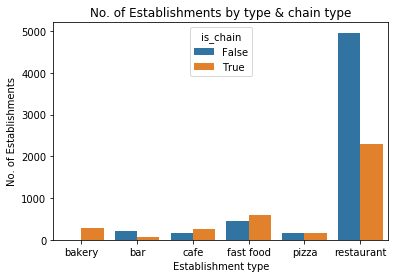

In [11]:
# group & plot by restaurant type & chain type

typ_chains = est_data.groupby(['est_type', 'is_chain'])['id'].count().reset_index()

ax = sns.barplot(x='est_type', y='id', hue='is_chain', data=typ_chains)
ax.set_title('No. of Establishments by type & chain type')
ax.set_xlabel('Establishment type')
ax.set_ylabel('No. of Establishments')
plt.show()

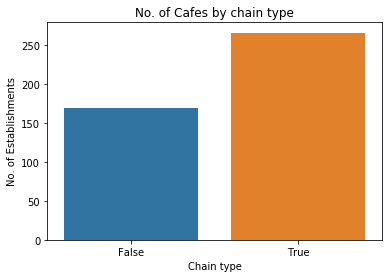

In [12]:
# cafe chains vs non-chains

ax = sns.barplot(x='is_chain', y='id', data=typ_chains.query('est_type == "cafe"'))
ax.set_title('No. of Cafes by chain type')
ax.set_xlabel('Chain type')
ax.set_ylabel('No. of Establishments')
plt.show()

##### Conclusion
Bakeries are most likely to be chains. In fact, there are no bakeries that are not part of a chain! On the contrary, most restaurants are not part of chains. As far as cafes go, most are chain cafes. Maybe it's worth analyzing data before and after the COVID-19 pandemic, because many small, family-owned restaurants have gone out of business!

#### Chain establishment characteristics

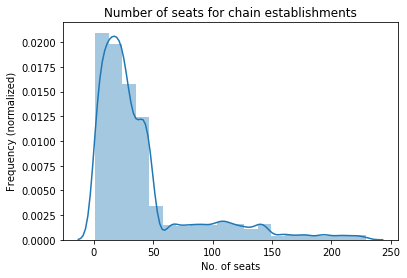

In [13]:
# filter & plot histogram of seat count

chains_only = est_data.query('is_chain == True')

ax = sns.distplot(chains_only['n_seats'], bins=20)
ax.set_title('Number of seats for chain establishments')
ax.set_xlabel('No. of seats')
ax.set_ylabel('Frequency (normalized)')
plt.show()

##### Conclusion
The majority of chain establishments have less than 50 seats. It seems like their strategy is to have a high number of smaller locations as opposed to a small number of large locations.

#### Avg number of seats per establishment type


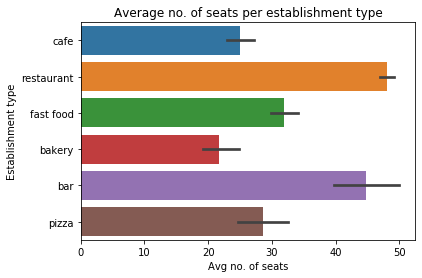

In [14]:
# plot & lable chart

ax = sns.barplot(x='n_seats', y='est_type', data=est_data)
ax.set_title('Average no. of seats per establishment type')
ax.set_xlabel('Avg no. of seats')
ax.set_ylabel('Establishment type')
plt.show()

##### Conclusion
Bars and restaurants generally have the highest number of seats. Bakeries and cafes usually have less seating available to customers. This makes sense since cafes and bakeries are usually smaller establishments that cater to a niche audience, while bars and restaurants are attempting to draw large crowds of people.

In [15]:
est_data

,id,est_name,address,is_chain,est_type,n_seats
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26
1,11787,reilly's,100 world way # 120,False,restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22
4,11790,pollen,2100 echo park ave,False,restaurant,20
...,...,...,...,...,...,...
9646,21432,hall of justice,217 w temple ave,False,restaurant,122
9647,21433,fin-melrose,5750 melrose ave,False,restaurant,93
9648,21434,juicy wingz,6741 hollywood blvd,True,fast food,15
9649,21435,medidate coffee,548 s spring st ste 100,False,cafe,6


#### Extract street names

In [16]:
# extract street names from 'address' column using regex

est_data['street_name'] = est_data['address'].str.extract(r'(((?<= )[\w]+) [a-z0-9 ]+)+').reset_index(drop=True)[0]
est_data.head()

,id,est_name,address,is_chain,est_type,n_seats,street_name
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26,n eagle rock blvd
1,11787,reilly's,100 world way # 120,False,restaurant,9,world way
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,hollywood blvd
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,w sunset blvd
4,11790,pollen,2100 echo park ave,False,restaurant,20,echo park ave


#### Top 10 steets by no. of restaurants

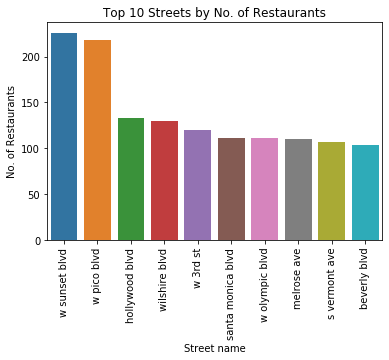

In [17]:
# sort top 10 & plot

rest_only = est_data.query('est_type == "restaurant"')
n_rest_by_street = rest_only.groupby('street_name')['id'].count().reset_index()

top_10_streets = n_rest_by_street.sort_values(by='id', ascending=False)[:10]

ax = sns.barplot(x='street_name', y='id', data=top_10_streets)
ax.set_title('Top 10 Streets by No. of Restaurants')
ax.set_xlabel('Street name')
ax.set_ylabel('No. of Restaurants')
plt.xticks(rotation=90)
plt.show()

##### Conclusion
Pico Blvd and Sunset Blvd have the highest number of restaurants. Some other popular streets are Hollywood Blvd, Wilshire Blvd, and W. 3rd St. Pico and Sunset are by far the leaders in this metric.

#### Streets with only one restaurant

In [18]:
# print # of streets with only one restaurant

print('Streets with only one restaurant:', n_rest_by_street.query('id == 1')['id'].count())

Streets with only one restaurant: 1107


#### Number of seats for restaurants on popular streets

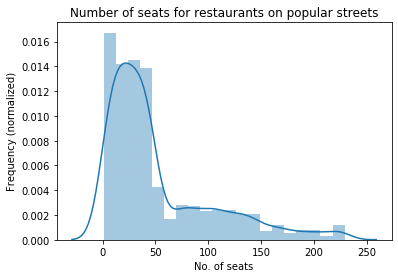

In [19]:
# filter for only top 10 street names

ax = sns.distplot(rest_only[rest_only['street_name'].isin(top_10_streets['street_name'])]['n_seats'], bins=20)
ax.set_title('Number of seats for restaurants on popular streets')
ax.set_xlabel('No. of seats')
ax.set_ylabel('Frequency (normalized)')
plt.show()

##### Conclusion
This distribution closely mirrors the one above for chain restaurants. It's likely that most of the restaurants on the most popular streets in LA are chain restaurants. Their strategy is to have a high number of establishments with less than 50-60 seats in each establishment.

### Step 3: Preparing a presentation

Presentation: https://drive.google.com/file/d/1l6TH9eXIfXRJJysAyS9a5zgzCPgSRbPZ/view?usp=sharing